<a href="https://colab.research.google.com/github/OptimalDecisions/sports-analytics-foundations/blob/main/getting-started/SA_4_3_Pivoting_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  ## Pandas Full Example of Data Preparation



  # Pivoting Data into A Different Format

  <img src = "../img/sa_logo.png" width="100" align="left">

  Ram Narasimhan

  <br><br><br>

  << [3.0 Visualization Overview](Data_Visualization_3_0_Overview.ipynb) | [3.1 Visualization Using Pandas](Pandas_Intermediate_2_10_GroupBy.ipynb)  |
  [3.2 Matplotlib Basics](Data_Visualization_3_2_Matplotlib_Basics.ipynb) >>




Concepts covered in this notebook.

1. Heatmaps
2. Pairplots
3. Color Palettes in Seabor


In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## NFL 2022 Season Data





In [52]:
url = 'https://raw.githubusercontent.com/OptimalDecisions/sports-analytics-foundations/main/data/nfl_2022_games.csv'
nfl = pd.read_csv(url)

In [53]:
nfl.sample(10)

,Week,Day,Date,Time,Winner/tie,Unnamed: 5,Loser/tie,Unnamed: 7,PtsW,PtsL,YdsW,TOW,YdsL,TOL
108,8,Thu,2022-10-27,8:15PM,Baltimore Ravens,@,Tampa Bay Buccaneers,boxscore,27.0,22.0,453.0,0.0,349.0,1.0
265,18,Sun,2023-01-08,4:25PM,San Francisco 49ers,NaN,Arizona Cardinals,boxscore,38.0,13.0,311.0,0.0,255.0,4.0
1,1,Sun,2022-09-11,1:00PM,New Orleans Saints,@,Atlanta Falcons,boxscore,27.0,26.0,385.0,1.0,416.0,2.0
171,12,Sun,2022-11-27,1:00PM,Washington Commanders,NaN,Atlanta Falcons,boxscore,19.0,13.0,314.0,1.0,332.0,1.0
123,9,Thu,2022-11-03,8:15PM,Philadelphia Eagles,@,Houston Texans,boxscore,29.0,17.0,360.0,1.0,303.0,2.0
104,7,Sun,2022-10-23,4:25PM,Kansas City Chiefs,@,San Francisco 49ers,boxscore,44.0,23.0,529.0,2.0,444.0,3.0
176,12,Sun,2022-11-27,4:25PM,Kansas City Chiefs,NaN,Los Angeles Rams,boxscore,26.0,10.0,437.0,2.0,198.0,2.0
222,15,Sun,2022-12-18,8:15PM,New York Giants,@,Washington Commanders,boxscore,20.0,12.0,288.0,0.0,387.0,2.0
145,10,Sun,2022-11-13,4:05PM,Indianapolis Colts,@,Las Vegas Raiders,boxscore,25.0,20.0,415.0,1.0,309.0,0.0
234,16,Sat,2022-12-24,4:25PM,Dallas Cowboys,NaN,Philadelphia Eagles,boxscore,40.0,34.0,419.0,1.0,442.0,4.0


Validation check: If there are any "bad" rows, we need to get rid of those.

In [54]:
nfl[nfl['Week'].isnull()]

,Week,Day,Date,Time,Winner/tie,Unnamed: 5,Loser/tie,Unnamed: 7,PtsW,PtsL,YdsW,TOW,YdsL,TOL
271,NaN,NaN,Playoffs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one row in this dataset, that is non-standard. Let's find that row and get rid of it!


In [55]:
nfl.isnull().sum()

Week            1
Day             1
Date            0
Time            1
Winner/tie      1
Unnamed: 5    162
Loser/tie       1
Unnamed: 7      1
PtsW            1
PtsL            1
YdsW            1
TOW             1
YdsL            1
TOL             1
dtype: int64

Since we cannot have "Week" or "Winner/tie" etc be Null, let's see which one it is.

In [56]:
nfl.dropna(subset=['Week'], inplace=True)


In [57]:
columns_to_keep = ['Week', 'Winner/tie', 'PtsW', "YdsW", 'Loser/tie', "PtsL", 'YdsL']
nfl = nfl[columns_to_keep]
nfl.rename(columns = {'Winner/tie': "Winner", "Loser/tie":'Loser'},inplace=True)

In [58]:
nfl

,Week,Winner,PtsW,YdsW,Loser,PtsL,YdsL
0,1,Buffalo Bills,31.0,413.0,Los Angeles Rams,10.0,243.0
1,1,New Orleans Saints,27.0,385.0,Atlanta Falcons,26.0,416.0
2,1,Cleveland Browns,26.0,355.0,Carolina Panthers,24.0,261.0
3,1,Chicago Bears,19.0,204.0,San Francisco 49ers,10.0,331.0
4,1,Pittsburgh Steelers,23.0,267.0,Cincinnati Bengals,20.0,432.0
...,...,...,...,...,...,...,...
280,Division,Cincinnati Bengals,27.0,412.0,Buffalo Bills,10.0,325.0
281,Division,San Francisco 49ers,19.0,312.0,Dallas Cowboys,12.0,282.0
282,ConfChamp,Philadelphia Eagles,31.0,269.0,San Francisco 49ers,7.0,164.0
283,ConfChamp,Kansas City Chiefs,23.0,357.0,Cincinnati Bengals,20.0,309.0


In [59]:
tidy_df = pd.melt(nfl, id_vars=['Week', 'Winner', 'Loser'],
                  value_vars=['YdsW', 'YdsL', 'PtsW', 'PtsL'],
                  var_name='Metric', value_name='Value')

tidy_df

,Week,Winner,Loser,Metric,Value
0,1,Buffalo Bills,Los Angeles Rams,YdsW,413.0
1,1,New Orleans Saints,Atlanta Falcons,YdsW,385.0
2,1,Cleveland Browns,Carolina Panthers,YdsW,355.0
3,1,Chicago Bears,San Francisco 49ers,YdsW,204.0
4,1,Pittsburgh Steelers,Cincinnati Bengals,YdsW,267.0
...,...,...,...,...,...
1131,Division,Cincinnati Bengals,Buffalo Bills,PtsL,10.0
1132,Division,San Francisco 49ers,Dallas Cowboys,PtsL,12.0
1133,ConfChamp,Philadelphia Eagles,San Francisco 49ers,PtsL,7.0
1134,ConfChamp,Kansas City Chiefs,Cincinnati Bengals,PtsL,20.0


In [60]:
# If the Metric is YdsW or PtsW, then we label is a winner_row
tidy_df['winner_row'] = tidy_df['Metric'].str.endswith('W')

In [61]:
# We only want to store one Team.
#If it is a winner's metric, we will store the winning team.
# if the metric refers to teh losing team, we will store the losing team
# We go row by row and check the Metric and choose the correct team...

tidy_df['Team'] = tidy_df.apply(lambda row:
                                row['Winner'] if row['winner_row'] \
                                else row['Loser'],
                                axis=1)



In [62]:
tidy_df

,Week,Winner,Loser,Metric,Value,winner_row,Team
0,1,Buffalo Bills,Los Angeles Rams,YdsW,413.0,True,Buffalo Bills
1,1,New Orleans Saints,Atlanta Falcons,YdsW,385.0,True,New Orleans Saints
2,1,Cleveland Browns,Carolina Panthers,YdsW,355.0,True,Cleveland Browns
3,1,Chicago Bears,San Francisco 49ers,YdsW,204.0,True,Chicago Bears
4,1,Pittsburgh Steelers,Cincinnati Bengals,YdsW,267.0,True,Pittsburgh Steelers
...,...,...,...,...,...,...,...
1131,Division,Cincinnati Bengals,Buffalo Bills,PtsL,10.0,False,Buffalo Bills
1132,Division,San Francisco 49ers,Dallas Cowboys,PtsL,12.0,False,Dallas Cowboys
1133,ConfChamp,Philadelphia Eagles,San Francisco 49ers,PtsL,7.0,False,San Francisco 49ers
1134,ConfChamp,Kansas City Chiefs,Cincinnati Bengals,PtsL,20.0,False,Cincinnati Bengals


In [73]:
# Drop unnecessary columns
tidy_df = tidy_df[['Week', 'Team', 'Metric', 'Value']].copy()
#tidy_df['Result'] = tidy_df['Result'].str.replace('Yds', "")
tidy_df


,Week,Team,Metric,Value
0,01,Buffalo Bills,YdsW,413.0
1,01,New Orleans Saints,YdsW,385.0
2,01,Cleveland Browns,YdsW,355.0
3,01,Chicago Bears,YdsW,204.0
4,01,Pittsburgh Steelers,YdsW,267.0
...,...,...,...,...
1131,2Division,Buffalo Bills,PtsL,10.0
1132,2Division,Dallas Cowboys,PtsL,12.0
1133,ConfChamp,San Francisco 49ers,PtsL,7.0
1134,ConfChamp,Cincinnati Bengals,PtsL,20.0


In [74]:
# Add a "0" to values from "1" through "9"
tidy_df['Week'] = tidy_df['Week'].apply(
    lambda x: x.zfill(2) if x.isdigit() and 1 <= int(x) <= 9 else x)

tidy_df['Week'] = tidy_df['Week'].str.replace("Wild", "1Wild")
tidy_df['Week'] = tidy_df['Week'].str.replace("Div", "2Div")




In [64]:
# Keep only one metric - YdsW
moi = 'Yds'
mini = tidy_df[tidy_df['Metric'].str.contains(moi)].copy()

In [67]:
mini

,Week,Team,Metric,Value
0,01,Buffalo Bills,YdsW,413.0
1,01,New Orleans Saints,YdsW,385.0
2,01,Cleveland Browns,YdsW,355.0
3,01,Chicago Bears,YdsW,204.0
4,01,Pittsburgh Steelers,YdsW,267.0
...,...,...,...,...
563,2Division,Buffalo Bills,YdsL,325.0
564,2Division,Dallas Cowboys,YdsL,282.0
565,ConfChamp,San Francisco 49ers,YdsL,164.0
566,ConfChamp,Cincinnati Bengals,YdsL,309.0


In [78]:
yds_cond = tidy_df['Metric'].str.contains("Yds")
pts_cond =tidy_df['Metric'].str.contains("Pts")
heat_yds = tidy_df[yds_cond].pivot(index="Team", columns="Week", values="Value")
heat_pts = tidy_df[pts_cond].pivot(index="Team", columns="Week", values="Value")


In [79]:
heat_yds

Week,01,02,03,04,05,06,07,08,09,10,...,12,13,14,15,16,17,18,22Division,ConfChamp,SuperBowl
Team,,,,,,,,,,,,,,,,,,,,,
Arizona Cardinals,282.0,413.0,365.0,338.0,363.0,315.0,326.0,375.0,262.0,298.0,...,366.0,NaN,323.0,240.0,325.0,339.0,255.0,NaN,NaN,NaN
Atlanta Falcons,416.0,261.0,386.0,333.0,261.0,289.0,214.0,406.0,315.0,291.0,...,332.0,306.0,NaN,320.0,327.0,298.0,382.0,NaN,NaN,NaN
Baltimore Ravens,274.0,473.0,394.0,296.0,325.0,406.0,254.0,453.0,319.0,NaN,...,415.0,285.0,309.0,324.0,299.0,240.0,386.0,NaN,NaN,NaN
Buffalo Bills,413.0,414.0,497.0,326.0,552.0,443.0,NaN,369.0,317.0,486.0,...,401.0,355.0,232.0,446.0,426.0,NaN,327.0,325.0,NaN,NaN
Carolina Panthers,261.0,275.0,293.0,220.0,308.0,203.0,343.0,478.0,228.0,333.0,...,349.0,NaN,328.0,209.0,570.0,400.0,203.0,NaN,NaN,NaN
Chicago Bears,204.0,228.0,363.0,304.0,271.0,391.0,390.0,371.0,368.0,408.0,...,292.0,409.0,NaN,248.0,209.0,230.0,259.0,NaN,NaN,NaN
Cincinnati Bengals,432.0,254.0,330.0,371.0,291.0,348.0,537.0,229.0,464.0,NaN,...,374.0,431.0,363.0,237.0,442.0,NaN,257.0,412.0,309.0,NaN
Cleveland Browns,355.0,405.0,376.0,403.0,443.0,328.0,336.0,440.0,NaN,297.0,...,367.0,304.0,344.0,283.0,249.0,301.0,307.0,NaN,NaN,NaN
Dallas Cowboys,244.0,337.0,391.0,279.0,239.0,315.0,330.0,442.0,NaN,421.0,...,430.0,385.0,404.0,397.0,419.0,361.0,182.0,282.0,NaN,NaN


In [80]:
heat_pts

Week,01,02,03,04,05,06,07,08,09,10,...,12,13,14,15,16,17,18,22Division,ConfChamp,SuperBowl
Team,,,,,,,,,,,,,,,,,,,,,
Arizona Cardinals,21.0,29.0,12.0,26.0,17.0,9.0,42.0,26.0,21.0,27.0,...,24.0,NaN,13.0,15.0,16.0,19.0,13.0,NaN,NaN,NaN
Atlanta Falcons,26.0,27.0,27.0,23.0,15.0,28.0,17.0,37.0,17.0,15.0,...,13.0,16.0,NaN,18.0,9.0,20.0,30.0,NaN,NaN,NaN
Baltimore Ravens,24.0,38.0,37.0,20.0,19.0,20.0,23.0,27.0,27.0,NaN,...,27.0,10.0,16.0,3.0,17.0,13.0,16.0,NaN,NaN,NaN
Buffalo Bills,31.0,41.0,19.0,23.0,38.0,24.0,NaN,27.0,17.0,30.0,...,28.0,24.0,20.0,32.0,35.0,NaN,35.0,10.0,NaN,NaN
Carolina Panthers,24.0,16.0,22.0,16.0,15.0,10.0,21.0,34.0,21.0,25.0,...,23.0,NaN,30.0,16.0,37.0,24.0,10.0,NaN,NaN,NaN
Chicago Bears,19.0,10.0,23.0,12.0,22.0,7.0,33.0,29.0,32.0,30.0,...,10.0,19.0,NaN,20.0,13.0,10.0,13.0,NaN,NaN,NaN
Cincinnati Bengals,20.0,17.0,27.0,27.0,17.0,30.0,35.0,13.0,42.0,NaN,...,20.0,27.0,23.0,34.0,22.0,NaN,27.0,27.0,20.0,NaN
Cleveland Browns,26.0,30.0,29.0,20.0,28.0,15.0,20.0,32.0,NaN,17.0,...,23.0,27.0,10.0,13.0,10.0,24.0,14.0,NaN,NaN,NaN
Dallas Cowboys,3.0,20.0,23.0,25.0,22.0,17.0,24.0,49.0,NaN,28.0,...,28.0,54.0,27.0,34.0,40.0,27.0,6.0,12.0,NaN,NaN


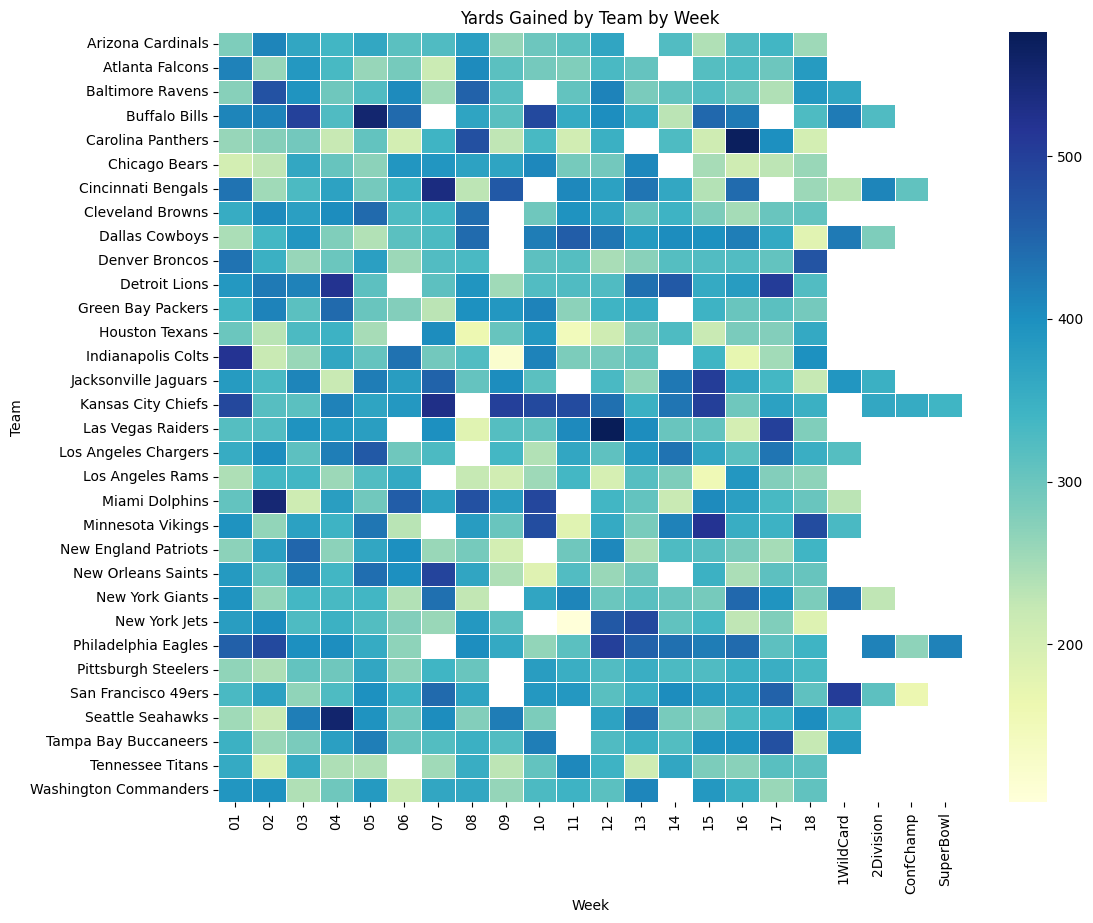

In [71]:
# Create a customized heatmap
plt.figure(figsize=(12,10))
sns.heatmap(hp, cmap="YlGnBu", linewidths=.5)

# Add title and labels
plt.title("Yards Gained by Team by Week")
plt.xlabel("Week")
plt.ylabel("Team")

# Show the plot
plt.show()


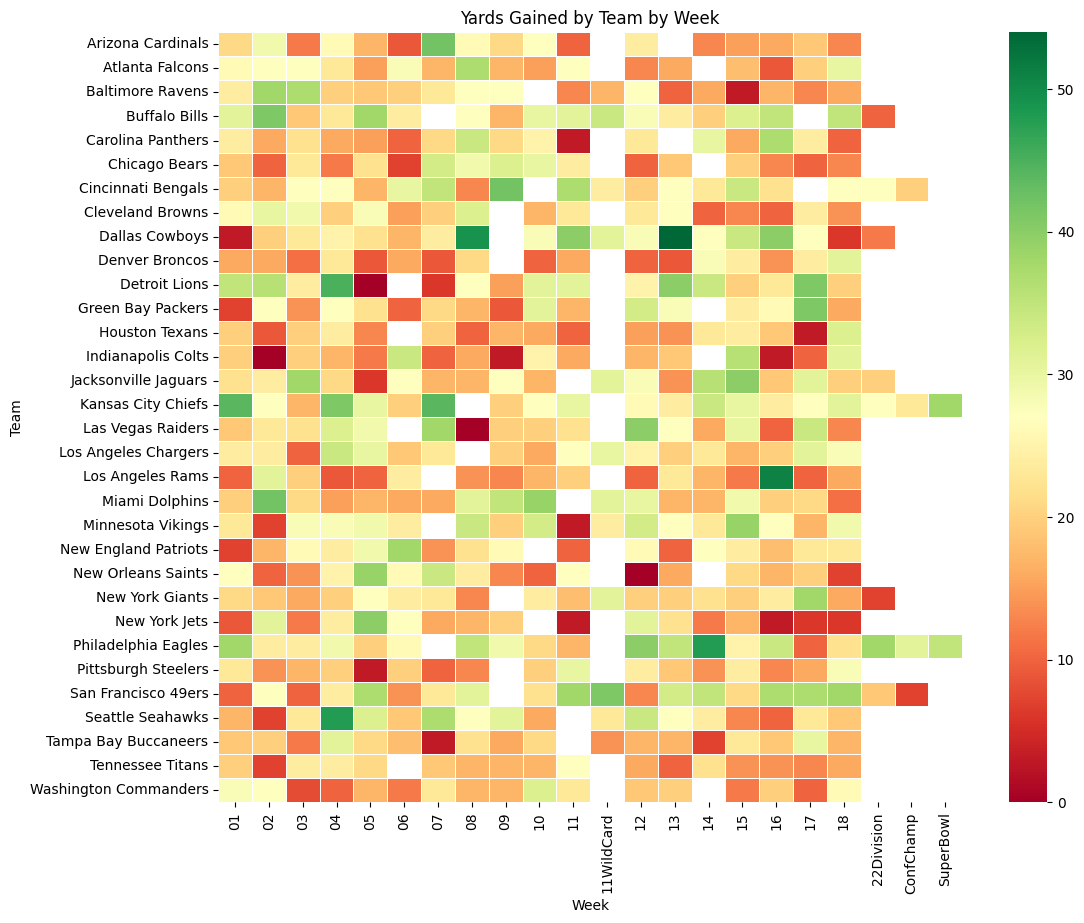

In [82]:
# Create a customized heatmap
plt.figure(figsize=(12,10))
sns.heatmap(heat_pts,  cmap="RdYlGn", linewidths=.5)

# Add title and labels
plt.title("Yards Gained by Team by Week")
plt.xlabel("Week")
plt.ylabel("Team")

# Show the plot
plt.show()
